# Installation

In [26]:
!pip install pandas textblob nltk plotly seaborn

In [27]:
import pandas as pd
from textblob import TextBlob

In [29]:
# train_df = pd.read_csv('train.tsv', sep='\t')
train_df = pd.read_csv('train.tsv', sep='\t', nrows=1000)

''' While reading tsv If you have a header, you can pass header=0.

pd.read_csv('c:/~/trainSetRel3.txt', sep='\t', header=0) '''

train_df.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [30]:
def add_sentiment_to_df(df):
    sentiment_tuple = []

    for x in range(0, df.shape[0]):
        QuantTextBlob = TextBlob(df.iloc[x][2])
        measures = QuantTextBlob.sentiment
        sentiment_tuple.append(measures)
    df['Text Score'] = sentiment_tuple
    return df

In [31]:
train_df = add_sentiment_to_df(train_df)
train_df

,PhraseId,SentenceId,Phrase,Sentiment,Text Score
0,1,1,A series of escapades demonstrating the adage ...,1,"(0.39999999999999997, 0.38125000000000003)"
1,2,1,A series of escapades demonstrating the adage ...,2,"(0.7, 0.6000000000000001)"
2,3,1,A series,2,"(0.0, 0.0)"
3,4,1,A,2,"(0.0, 0.0)"
4,5,1,series,2,"(0.0, 0.0)"
...,...,...,...,...,...
995,996,36,heroes,3,"(0.0, 0.0)"
996,997,36,of horror movies,2,"(0.0, 0.0)"
997,998,36,horror movies,2,"(0.0, 0.0)"
998,999,36,horror,1,"(0.0, 0.0)"


### Create another, new column that prints *only* the polarity score

In [32]:
def add_polarity_to_df(df):
    polarity_list = []

    for x in range(0, df.shape[0]):
        QuantTextBlob = TextBlob(df.iloc[x][2])
        measures = QuantTextBlob.sentiment.polarity
        polarity_list.append(measures)
    df['Text Polarity'] = polarity_list
    return df

In [33]:
train_df = add_polarity_to_df(train_df)
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment,Text Score,Text Polarity
0,1,1,A series of escapades demonstrating the adage ...,1,"(0.39999999999999997, 0.38125000000000003)",0.4
1,2,1,A series of escapades demonstrating the adage ...,2,"(0.7, 0.6000000000000001)",0.7
2,3,1,A series,2,"(0.0, 0.0)",0.0
3,4,1,A,2,"(0.0, 0.0)",0.0
4,5,1,series,2,"(0.0, 0.0)",0.0


## Vader

In [34]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer as vad
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [35]:
train_df = pd.read_csv('train.tsv', sep='\t', nrows=1000)

''' While reading tsv If you have a header, you can pass header=0.

pd.read_csv('c:/~/trainSetRel3.txt', sep='\t', header=0) '''

train_df.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [36]:
vader = train_df.copy()
sentiment = vad()

# Making additional columns for sentiment score in the vader dataframe
sen=['Positive','Negative','Neutral']
sentiments = [sentiment.polarity_scores(i) for i in vader['Phrase'].values]
vader['Negative Score']=[i['neg'] for i in sentiments]
vader['Positive Score'] = [i['pos'] for i in sentiments]
vader['Neutral Score'] = [i['neu'] for i in sentiments]
vader['Compound Score'] = [i['compound'] for i in sentiments]
score = vader['Compound Score'].values

t = []

for i in score:
    if i >= 0.05 :
        t.append('Positive')
    elif i <= -0.05:
        t.append('Negative')
    else:
        t.append('Neutral')
vader['Overall Sentiment'] = t



In [37]:
vader.head()

,PhraseId,SentenceId,Phrase,Sentiment,Negative Score,Positive Score,Neutral Score,Compound Score,Overall Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1,0.0,0.157,0.843,0.5579,Positive
1,2,1,A series of escapades demonstrating the adage ...,2,0.0,0.195,0.805,0.4404,Positive
2,3,1,A series,2,0.0,0.000,1.000,0.0000,Neutral
3,4,1,A,2,0.0,0.000,0.000,0.0000,Neutral
4,5,1,series,2,0.0,0.000,1.000,0.0000,Neutral


In [38]:
import plotly.express as px

fig = px.histogram(data_frame=vader, x='Compound Score', color='Overall Sentiment', template='plotly')
fig.show()

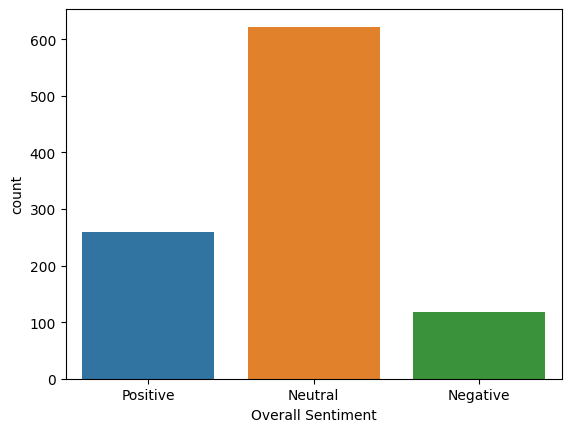

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=vader, x='Overall Sentiment')
plt.show()